In [33]:
# %load common.py
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt

import statsmodels.api as sm

import seaborn as sns

%matplotlib inline

def ols(y, x):
    return sm.OLS(y, sm.add_constant(x)).fit()

def load_autos_dataset():
    auto = pd.read_csv('./data/Auto.csv', na_values='?', index_col='name')
    auto = auto.dropna()
    return auto

def load_boston_dataset():
    rdataset = sm.datasets.get_rdataset('Boston', 'MASS', True)
    return rdataset.data

def load_carseats_dataset():
    return pd.read_csv('./data/Carseats.csv', index_col=0)

In [53]:
Default = pd.read_excel('./data/Default.xlsx')

In [54]:
Default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [55]:
Default.shape

(10000, 4)

In [19]:
subset = Default.sample(frac=0.3)

In [21]:
grouped = subset.groupby('default')

In [42]:
sns.set_style('white')

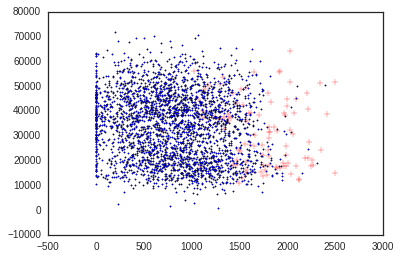

In [45]:
yes_group = grouped.get_group('Yes')
no_group = grouped.get_group('No')
plt.scatter(yes_group['balance'], yes_group['income'], s=40, c='r', marker='+')
plt.scatter(no_group['balance'], no_group['income'], s=2, c='b', marker='o')

In [47]:
from sklearn import linear_model

In [59]:
Default['default_Yes'] = Default['default'].map(lambda x: 1 if x == 'Yes' else 0)

In [79]:
LogIt = linear_model.LogisticRegression(solver='newton-cg')

In [78]:
LogIt?

In [85]:
result = LogIt.fit(Default['balance'].reshape(-1,1), Default['default_Yes'])

In [88]:
(result.intercept_, result.coef_)

(array([-10.65132381]), array([[ 0.00549891]]))

In [91]:
result.predict_proba(1000)

array([[ 0.99424784,  0.00575216]])

In [92]:
result.predict_proba(2000)

array([[ 0.41423096,  0.58576904]])

In [96]:
result_sm = sm.Logit(Default['default_Yes'], sm.add_constant(Default['balance'])).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [97]:
result_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Sep 2016   Pseudo R-squ.:                  0.4534
Time:                        20:40:28   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000       -11.359    -9.943
balance        0.0055      0.000     24.952      0.000         0.005     0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [99]:
result_sm.predict([1, 1000])

array([ 0.00575215])

In [100]:
result_sm.predict([1, 2000])

array([ 0.58576937])

In [102]:
Default['student_Yes'] = Default['student'].map(lambda x: 1 if x == 'Yes' else 0)

In [106]:
result = LogIt.fit(Default['student_Yes'].reshape(-1,1), Default['default_Yes'])
(result.intercept_, result.coef_)

(array([-3.50213151]), array([[ 0.39959759]]))

In [107]:
result_sm = sm.Logit(Default['default_Yes'], sm.add_constant(Default['student_Yes'])).fit()
result_sm.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Sep 2016   Pseudo R-squ.:                0.004097
Time:                        20:44:13   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                 0.0005416
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          -3.5041      0.071    -49.554      0.000        -3.643    -3.366
student_Yes     0.4049      0.115      3.520      0.000         0.179     0.630
===============================================================================
"""

In [110]:
(result.predict(1), result.predict_proba(1))

(array([0]), array([[ 0.95699715,  0.04300285]]))

In [114]:
(result.predict(0), result.predict_proba(0))

(array([0]), array([[ 0.97074836,  0.02925164]]))

In [112]:
result_sm.predict([1, 1])

array([ 0.04313859])

In [113]:
result_sm.predict([1, 0])

array([ 0.02919501])

In [115]:
result_sm = sm.Logit(Default['default_Yes'], sm.add_constant(Default[['balance', 'income', 'student_Yes']]))

In [116]:
result_sm = result_sm.fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [117]:
result_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Sep 2016   Pseudo R-squ.:                  0.4619
Time:                        20:54:46   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         -10.8690      0.492    -22.079      0.000       -11.834    -9.904
balance         0.0057      0.000     24.737      0.000         0.005     0.006
income       3.033e-06    8.2e-06      0.370      0.712      -1.3e-05  1.91e-05
student_Yes    -0.6468      0.236     -2.738      0.006        -1.110    -0.184
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [118]:
result_sm.predict([1, 1500, 40000, 1])

array([ 0.05788194])

In [119]:
result_sm.predict([1, 1500, 40000, 0])

array([ 0.10499192])

In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [122]:
LinearDiscriminantAnalysis?

,default,student,balance,income,default_Yes,student_Yes
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,0,1
3,No,No,1073.549164,31767.138947,0,0
4,No,No,529.250605,35704.493935,0,0
5,No,No,785.655883,38463.495879,0,0


In [124]:
lda = LinearDiscriminantAnalysis()
lda.fit(Default[['balance', 'student_Yes']], Default['default_Yes'])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [137]:
from sklearn.metrics import confusion_matrix

In [139]:
confusion_matrix(Default['default_Yes'], 
                 lda.predict(Default[['balance', 'student_Yes']]),
                 labels=[0,1])

array([[9644,   23],
       [ 252,   81]])

In [152]:
default_prediction = lda.predict_proba(Default[['balance', 'student_Yes']])

In [153]:
default_prediction = [1 if x[1] >= 0.2 else 0 for x in default_prediction]

In [155]:
confusion_matrix(Default['default_Yes'], default_prediction, [0,1])

array([[9432,  235],
       [ 138,  195]])